In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
params_list1 = np.load('param_lists_on_32_30000samples.npy')
params_list2 = np.load('param_lists_on_32_50000samples.npy')
params_list3 = np.load('param_lists_on_32_60000samples.npy')

fitness_list1 = np.load('fitness_list_on_32_30000samples.npy')
fitness_list2 = np.load('fitness_list_on_32_50000samples.npy')
fitness_list3 = np.load('fitness_list_on_32_60000samples.npy')

In [3]:
combined_params_list = np.concatenate((params_list1, params_list2, params_list3), axis=1)
combined_fitness_list = np.concatenate((fitness_list1, fitness_list2, fitness_list3), axis=0)

In [4]:
combined_params_list.shape, combined_fitness_list.shape

((7, 140000), (140000,))

In [5]:
# get target
import sys
sys.path.append('..')
from dataset_reader import Traces_Dataset

dataset = Traces_Dataset('../dataset_test.csv')
target_num = 32
target_params = dataset.params[target_num].numpy()

In [6]:
params = {'p': target_params[0], 
          'g_max': target_params[1], 
          'E_rev': target_params[2], 
                 'a_m': target_params[3], 
                 'b_m': target_params[4], 
                 'delta_m': target_params[5], 
                 's_m': target_params[6]}
params_names = list(params.keys())

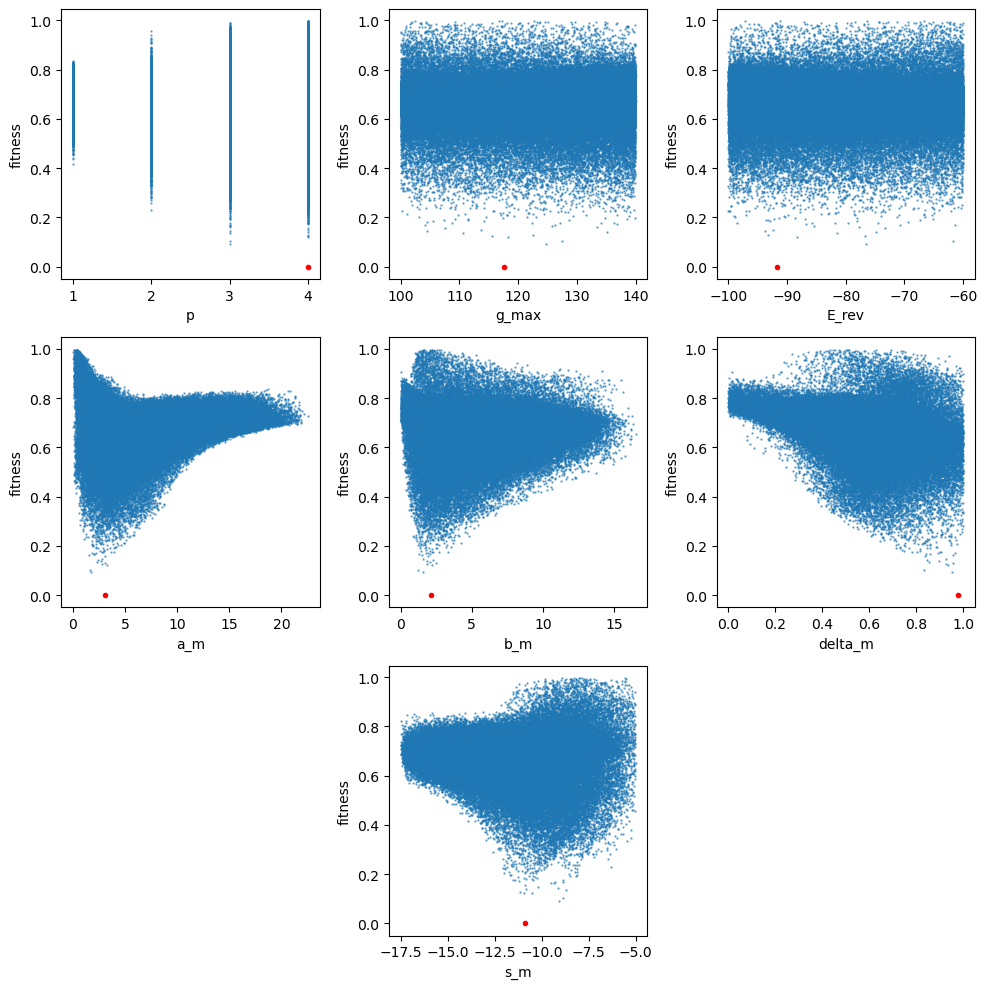

In [7]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot each subplot
for i in range(7):
    if i != 6:  # Skip the empty plot area
        axs[i // 3, i % 3].scatter(combined_params_list[i], combined_fitness_list, alpha=0.6, s=0.5)
        axs[i // 3, i % 3].plot(target_params[i], 0, 'ro', markersize=3)
        axs[i // 3, i % 3].set_xlabel(params_names[i])  # Set x-label for each subplot
        axs[i // 3, i % 3].set_ylabel('fitness')
        # axs[i // 3, i % 3].set_title(f'Plot {i+1}')
    else:
        axs[2, 1].scatter(combined_params_list[6], combined_fitness_list, alpha=0.6, s=0.5)
        axs[2, 1].plot(target_params[6], 0, 'ro', markersize=3)
        axs[2, 1].set_xlabel(params_names[6])
        axs[2, 1].set_ylabel('fitness')

# Remove the empty plot area
fig.delaxes(axs[2, 0])
fig.delaxes(axs[2, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

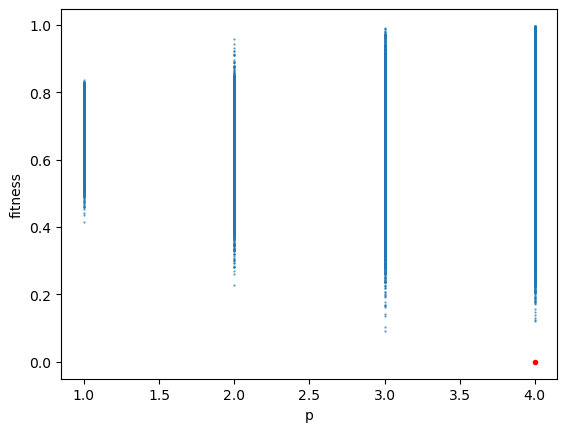

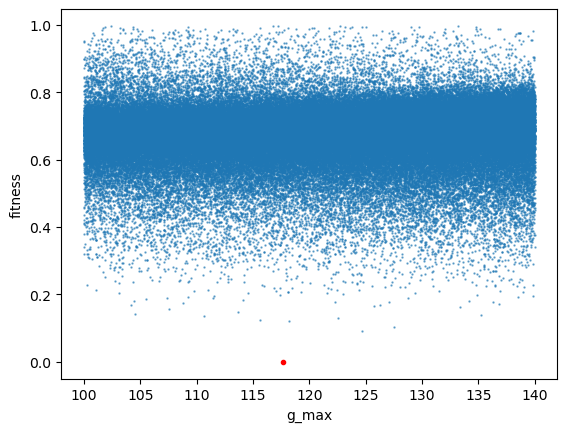

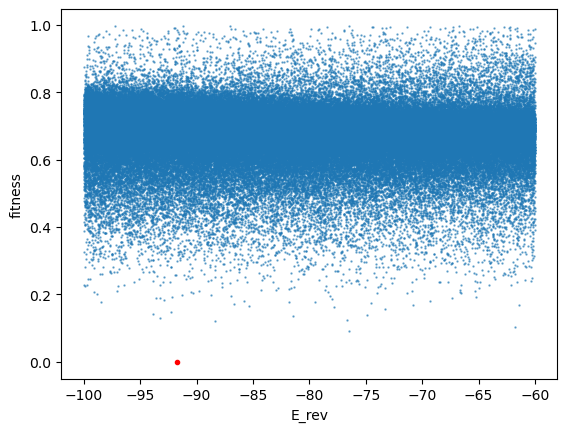

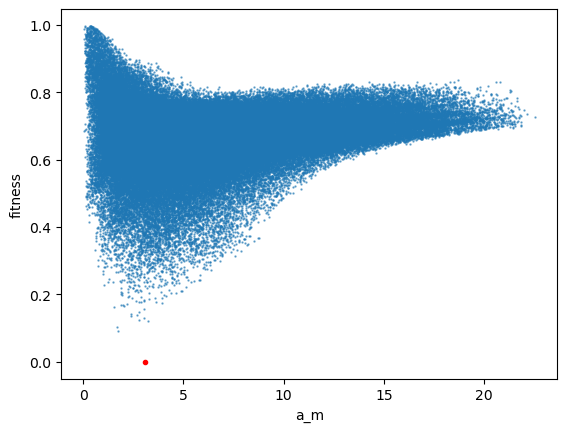

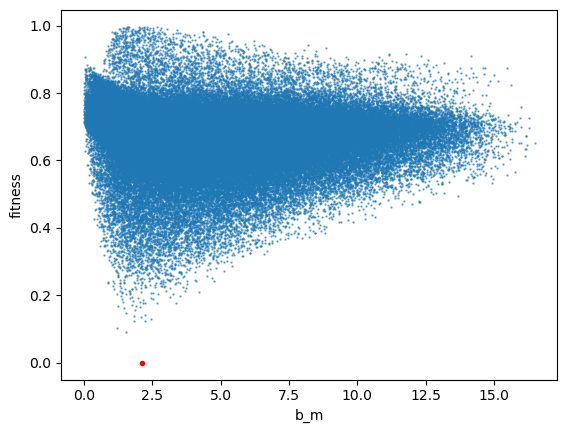

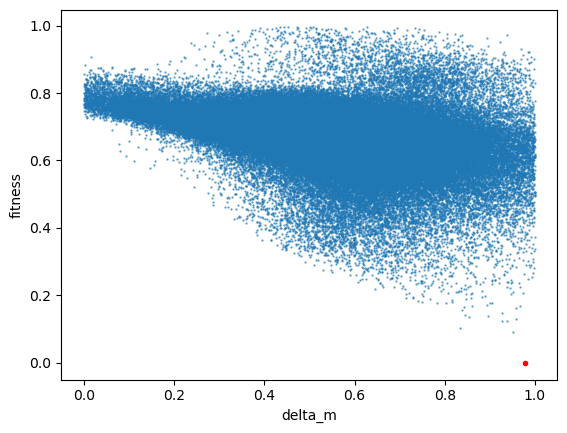

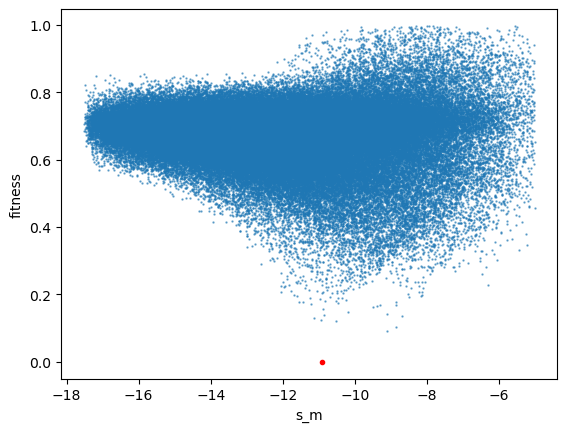

In [8]:
for i in range(7):
    plt.figure()
    plt.scatter(combined_params_list[i], combined_fitness_list, alpha=0.6, s=0.5)
    plt.plot(target_params[i], 0, 'ro', markersize=3)
    plt.xlabel(params_names[i])
    plt.ylabel('fitness')
    # plt.savefig(f'figure_{params_names[i]}_on_{target_num}_{n_samples}samples.png')  # Save the figure with a filename based on the parameter name

### 2d projection combined

In [9]:
twod_params_list1 = np.load('2d_param_lists_on_9_30000samples.npy')
twod_params_list2 = np.load('2d_param_lists_on_9_50000samples.npy')
twod_params_list3 = np.load('2d_param_lists_on_9_60000samples.npy')

twod_fitness_list1 = np.load('2d_fitness_list_on_9_30000samples.npy')
twod_fitness_list2 = np.load('2d_fitness_list_on_9_50000samples.npy')
twod_fitness_list3 = np.load('2d_fitness_list_on_9_60000samples.npy')

In [10]:
twod_combined_params_list = np.concatenate((twod_params_list1, twod_params_list2, twod_params_list3), axis=1)
twod_combined_fitness_list = np.concatenate((twod_fitness_list1, twod_fitness_list2, twod_fitness_list3), axis=0)

In [11]:
twod_combined_params_list.shape, twod_combined_fitness_list.shape

((7, 140000), (140000,))

In [12]:
# get target
import sys
sys.path.append('..')
from dataset_reader import Traces_Dataset

dataset = Traces_Dataset('../dataset_test.csv')
target_num = 9
target_params_2d = dataset.params[target_num].numpy()

In [13]:
params = {'p': target_params[0], 
          'g_max': target_params[1], 
          'E_rev': target_params[2], 
                 'a_m': target_params[3], 
                 'b_m': target_params[4], 
                 'delta_m': target_params[5], 
                 's_m': target_params[6]}
params_names = list(params.keys())

In [14]:
import itertools
arr = np.array([0,1,2,3,4,5,6])

# Using itertools.combinations
combinations = list(itertools.combinations(arr, 2))
combinations

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]

In [15]:
target_params_2d

array([  4.       , 118.27517  , -71.81706  ,   2.0534372,  13.061292 ,
         0.1570644, -11.075991 ], dtype=float32)

In [16]:
id = 0
target_params_2d[combinations[id][0]], target_params_2d[combinations[id][1]]

(4.0, 118.27517)

/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_1655/3668029255.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_code)


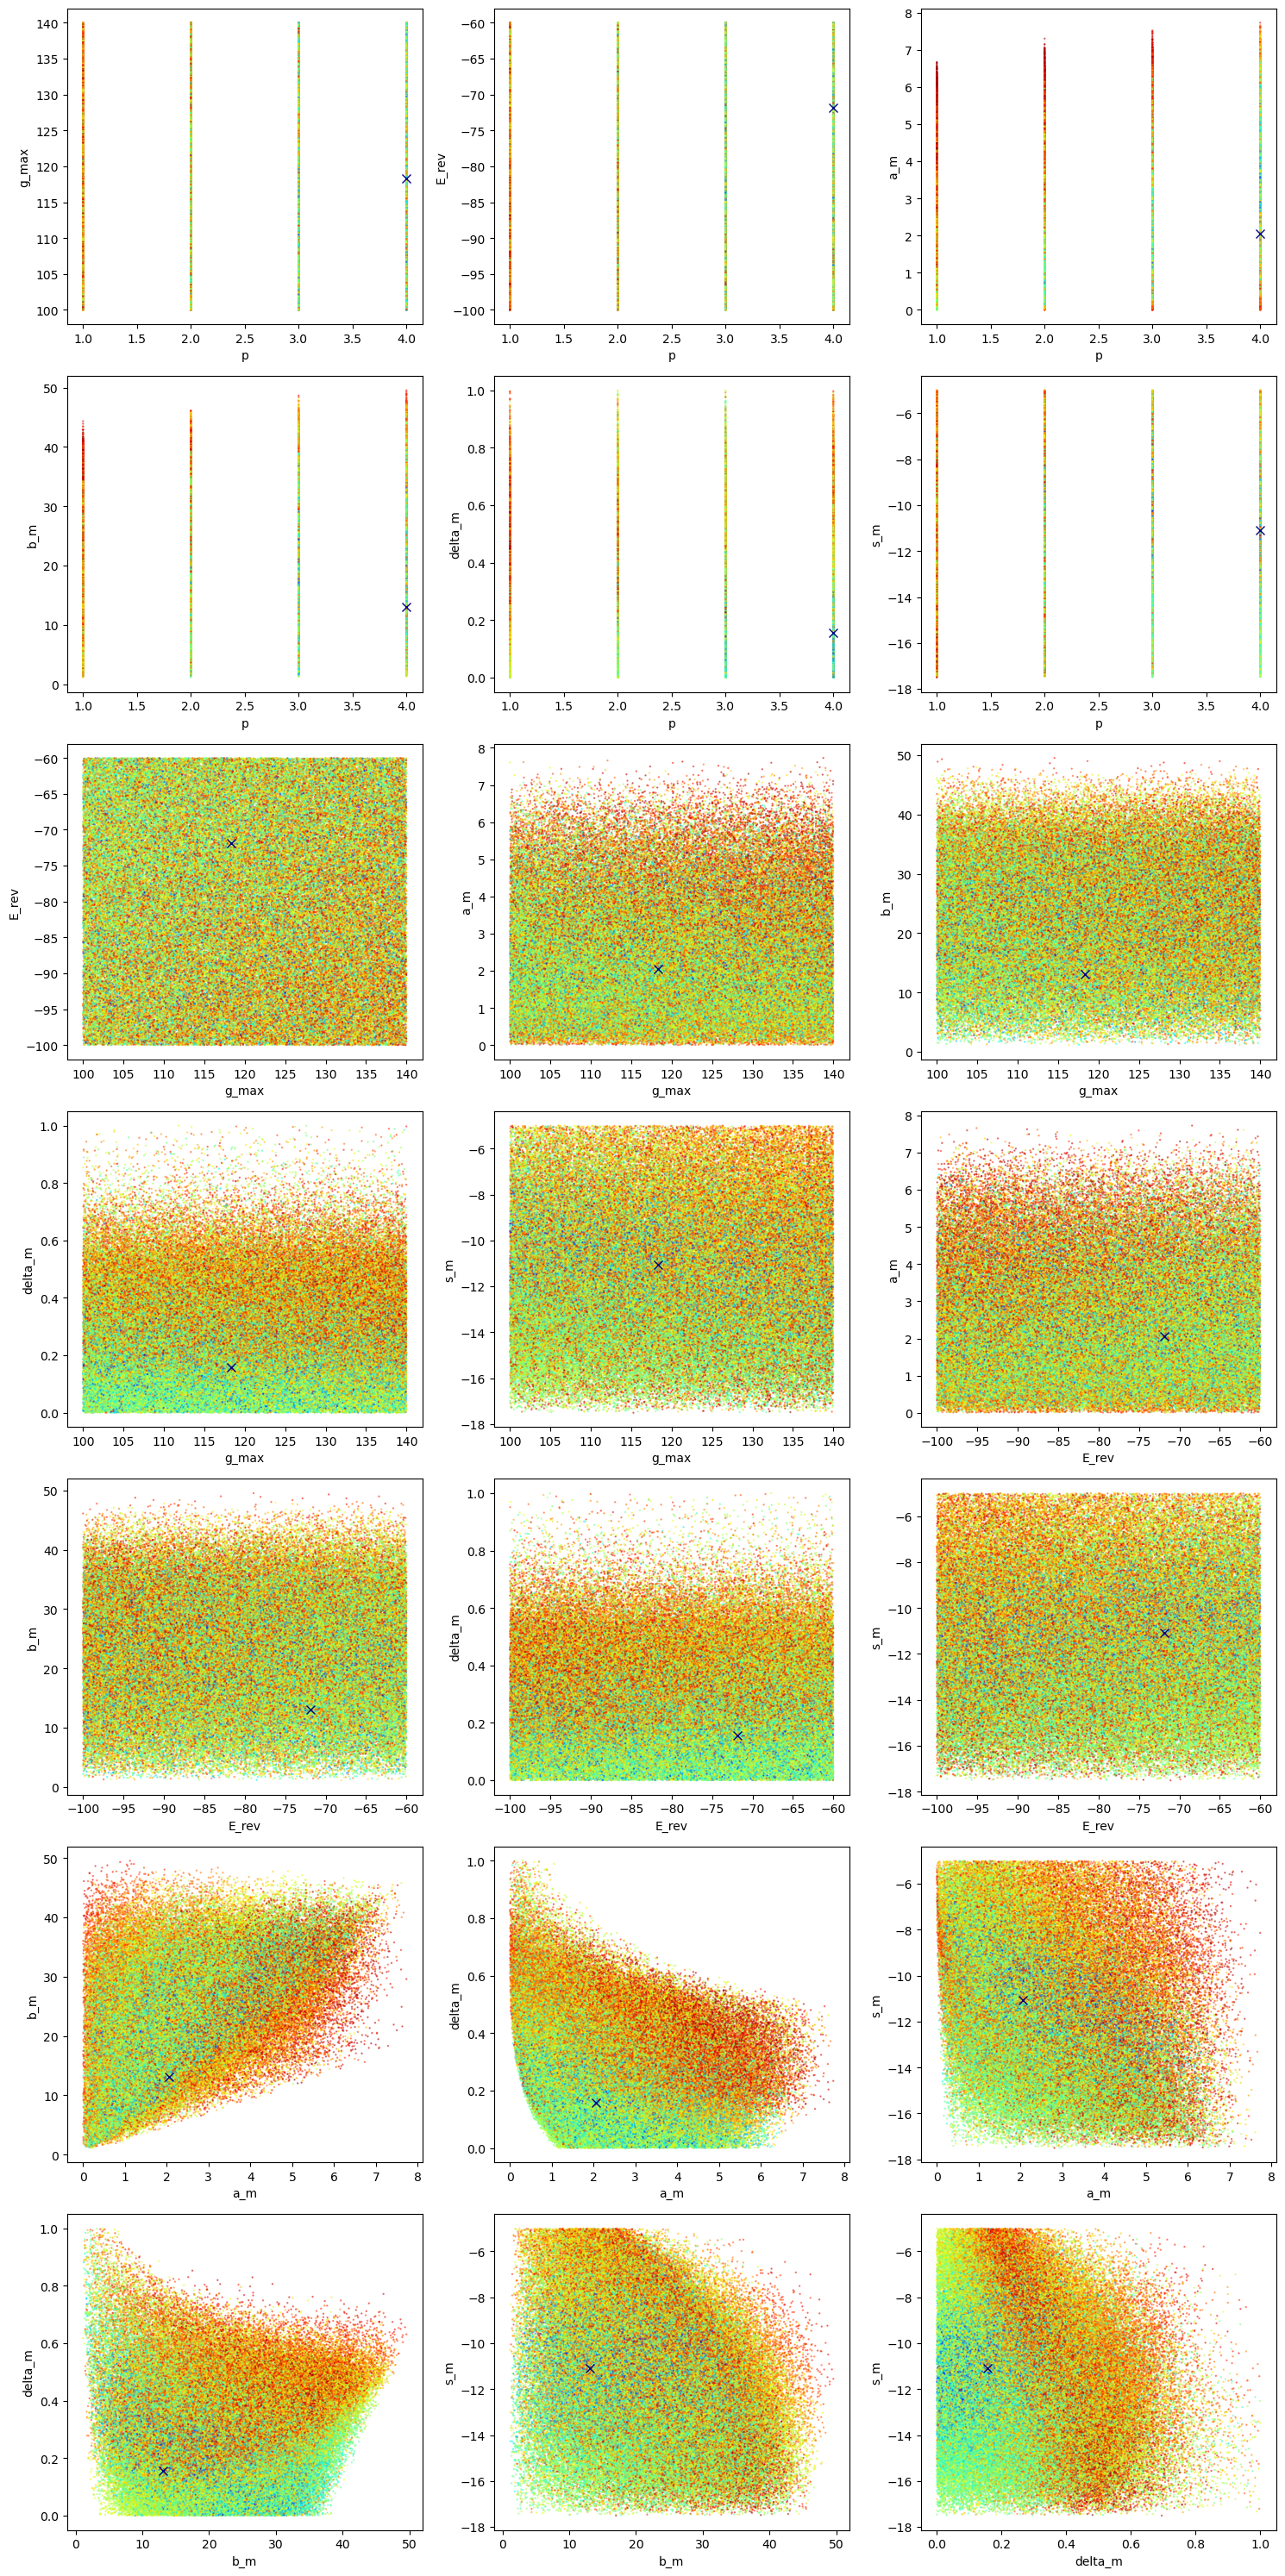

In [17]:
import matplotlib.cm as cm

color_code = 'jet'
# Create a colormap object for BRG
cmap = cm.get_cmap(color_code)

# Get the lowest color (blue) from the colormap
lowest_color = cmap(0.0)


# # Your intervals for assigning colors
# # This is just an example, you should modify this according to your specific intervals
# intervals = np.linspace(np.min(twod_combined_fitness_list), np.max(twod_combined_fitness_list), 5)  # Define your intervals here
# colors = ['red', 'green', 'blue', 'yellow', 'black']  # Add more colors if needed

# def assign_color(value):
#     for i in range(len(intervals)-1):
#         if intervals[i] <= value < intervals[i+1]:
#             return colors[i]
#     return colors[-1]  # Default color if value doesn't fall into any interval

# Create a subplot grid with 7 rows and 3 columns
fig, axs = plt.subplots(7, 3, figsize=(15, 30))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        idx = i * len(ax_row) + j  # Calculate the index of the subplot
        if idx < len(combinations):
            x_data = np.array(twod_combined_params_list[combinations[idx][0]])
            y_data = np.array(twod_combined_params_list[combinations[idx][1]])

            x_target = target_params_2d[combinations[idx][0]]
            y_target = target_params_2d[combinations[idx][1]]
        
            # point_colors = [assign_color(value) for value in twod_combined_fitness_list]
        
            ax.scatter(x_data, y_data, c=twod_combined_fitness_list, cmap=color_code, alpha=0.5, s=0.5)
            
            ax.plot(x_target, y_target, marker='x', color=lowest_color, markersize=7)
            # ax.set_title(f'Combination {combinations[idx][0]},{combinations[idx][1]}')
            ax.set_xlabel(f'{list(params.keys())[combinations[idx][0]]}')  # Add x-axis label
            ax.set_ylabel(f'{list(params.keys())[combinations[idx][1]]}')  # Add y-axis label
        else:
            ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()
